<a href="https://colab.research.google.com/github/BeamlakTamirat/DS/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kagglehub

In [3]:
import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
path = kagglehub.dataset_download('mirichoi0218/insurance')
path

'/kaggle/input/insurance'

In [7]:
import os

# See what files you got
print(os.listdir(path))

# Then load it (assuming 'insurance.csv' is inside)
df = pd.read_csv(os.path.join(path, 'insurance.csv'))

print(df.head())

['insurance.csv']
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Explore

In [8]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to all object (categorical) columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

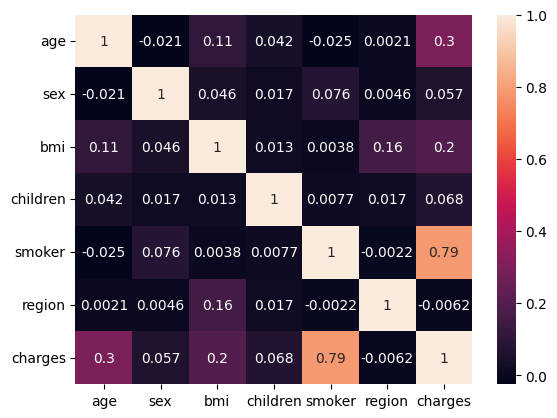

In [ ]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, annot= True);

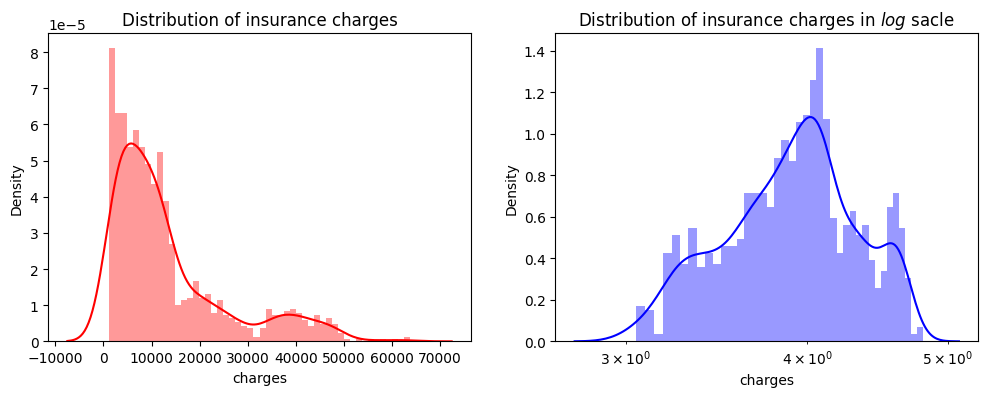

In [ ]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges.

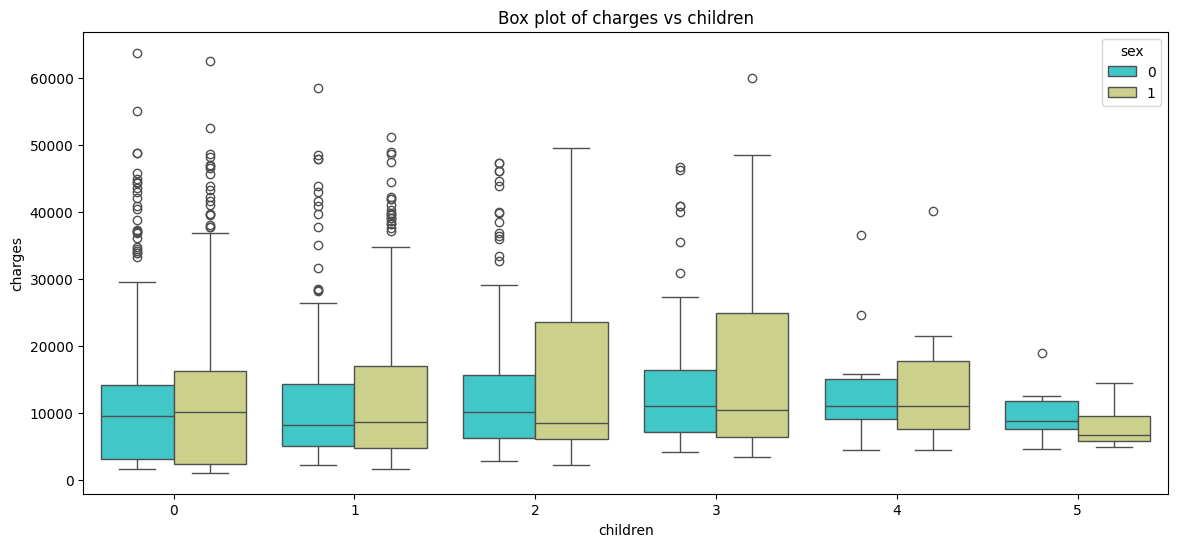

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [ ]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


## Feature Engineering

In [ ]:
## Log transform
df['charges'] = np.log(df['charges'])

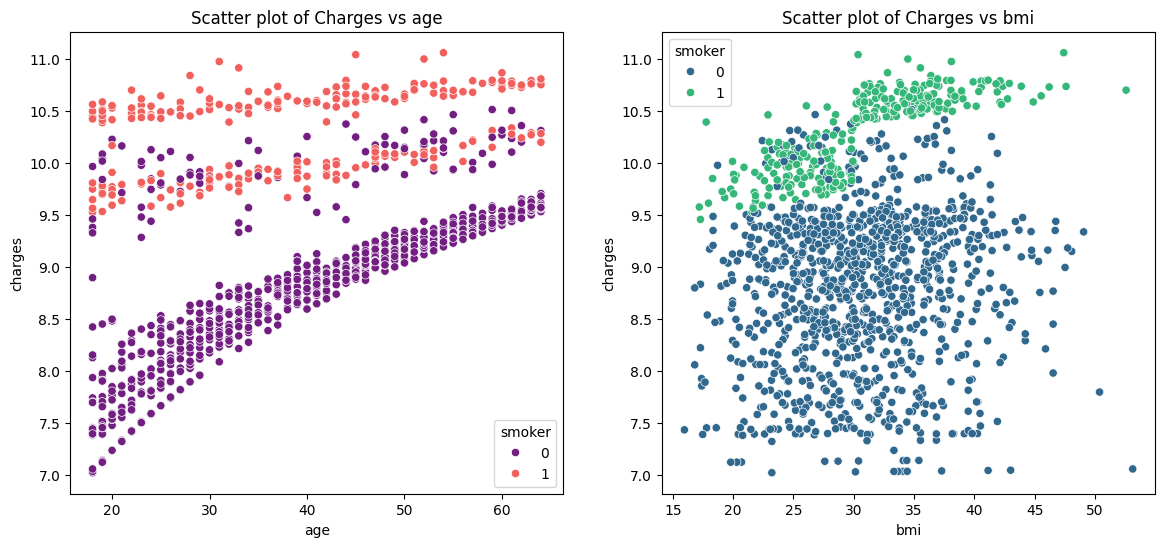

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

## Build Model

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:
# Separate the target variable and feature matrix
y = df['bmi']
feature_matrix = ['age', 'sex','charges','region']
X = df[feature_matrix]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [16]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
model.coef_

array([ 242.45561416, 1646.20229593])

In [18]:
model.intercept_

np.float64(3042.781359876226)

## Evaluate

In [19]:
# sklearn regression module
y_pred_sk = model.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = model.score(X_test,y_test)
print('The Mean Square Error(MSE) is: ', mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) is:  122214732.47375573
R square obtain for scikit learn library is : 0.13112426356205087
